# House Price Predictor utilizando Decision Tree e Random Forest 

Exemplo utilizando pandas para a leitura dos dados e sklearn para ML

A base de dados vem da competição House Prices: Advanced Regression Techniques (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

O código desenvolvido foi baseado no seguinte tutorial (https://www.kaggle.com/dansbecker/how-models-work)

In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [16]:
file_path = 'databases/housePrices/train.csv'
data = pd.read_csv(file_path)

data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


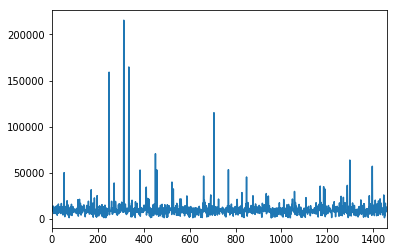

In [18]:
data['LotArea'].plot()

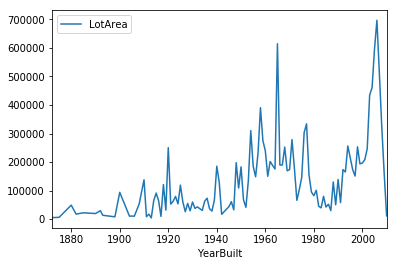

In [19]:
# Escolhendo atributo que será o alvo da predição
price_data = data.SalePrice
y = price_data

# Escolhendo atributos que serão utilizados para fazer a predição
predictors = ['LotArea', 'GarageArea', 'YearBuilt', 'BedroomAbvGr']
X = data[predictors]

by_year_lotArea = data[['YearBuilt', 'LotArea']].groupby('YearBuilt').aggregate(np.sum)
by_year_lotArea.plot()

### Regressão Linear Simples

In [20]:
#Separando dados em treino, testes e validadores
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [21]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)
preds = lr_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

39964.017451131476


### Outros modelos

#### DecisionTree com toda a base, sem separar em treino/teste

In [8]:
model = DecisionTreeRegressor()

model.fit(X,y)

predicted_prices = model.predict(X)
mean_absolute_error(y, predicted_prices)

78.86917808219178

In [9]:
#função para avaliar o MAE variando o numero de leafs
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)


#### DecisionTree separando os dados em treino/teste

In [11]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  36521
Max leaf nodes: 50  		 Mean Absolute Error:  35263
Max leaf nodes: 500  		 Mean Absolute Error:  39876
Max leaf nodes: 5000  		 Mean Absolute Error:  40309


#### RandomForest separando os dados em treino/teste

In [14]:
forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, preds))

29465.261552511416
